In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import configparser
import os
from pathlib import Path

In [2]:
# OLD HARDCODED
dummy_data = [
    {"program": "coremark", "simulator": "etiss", "Trace": 10.0, "Load": 8.0, "Static Analysis": 0.55, "Dynamic Analysis": 4.5, "Call Stack": 3.5, "Callgrind Backend": 1.0},
    {"program": "coremark", "simulator": "spike", "Trace": 7.0, "Load": 7.0, "Static Analysis": 0.6, "Dynamic Analysis": 4.5, "Call Stack": 3.5, "Callgrind Backend": 1.0},
    {"program": "coremark", "simulator": "tgc", "Trace": 12.0, "Load": 6.0, "Static Analysis": 0.6, "Dynamic Analysis": 4.5, "Call Stack": 3.5, "Callgrind Backend": 1.0},
    {"program": "coremark", "simulator": "ovp", "Trace": 4.0, "Load": 5.0, "Static Analysis": 0.6, "Dynamic Analysis": 4.5, "Call Stack": 3.5, "Callgrind Backend": 1.0},
    
]

dummy_df = pd.DataFrame(dummy_data)
dummy_df["name"] = dummy_df["program"] + "-" + dummy_df["simulator"]
dummy_df.set_index("name", inplace=True)
dummy_df.drop(columns=["program", "simulator"], inplace=True)




In [3]:
# NEW RANDOM
import pandas as pd
import numpy as np

programs = [
    "coremark", "aha-mont64", "crc32", "depthconv", "edn", "huffbench",
    "matmult-int", "md5sum", "nettle-aes", "nettle-sha256",
    "nsichneu", "picojpeg", "qrduino", "sglib-combined",
    "slre", "statemate", "tarfind", "ud", "wikisort", "xgboost"
]

simulators = ["etiss", "spike", "tgc", "ovp"]
stages = ["Trace", "Load", "Static Analysis", "Dynamic Analysis", "Call Stack", "Callgrind Backend"]

# Generate random data
data = []
# np.random.seed(45)  # for reproducibility

for prog in programs:
    for sim in simulators:
        row = {
            "program": prog,
            "simulator": sim,
            "Trace": np.random.uniform(2, 15),           # e.g., 2-15 seconds
            "Load": np.random.uniform(5, 10),           # 5-10 seconds
            "Static Analysis": np.random.uniform(0.4, 0.7), 
            "Dynamic Analysis": np.random.uniform(3, 6),
            "Call Stack": np.random.uniform(2, 5),
            "Callgrind Backend": np.random.uniform(0.8, 1.2)
        }
        data.append(row)

# Create DataFrame
dummy_df = pd.DataFrame(data)
dummy_df["name"] = dummy_df["program"] + "-" + dummy_df["simulator"]
dummy_df.set_index("name", inplace=True)

In [4]:
%pwd

'/work/git/colabs/minres/isaac-toolkit/ipynb'

In [5]:
# NEW NEW REAL DATA
programs = [
    "coremark",
    "aha-mont64", "crc32", "depthconv", "edn", "huffbench",
    "matmult-int", "md5sum", "nettle-aes", "nettle-sha256",
    "nsichneu", "picojpeg", "qrduino", "sglib-combined",
    "slre", "statemate", "tarfind", "ud", "wikisort", "xgboost"
]

simulators = ["etiss", "spike_bm", "tgc"]
factors = [1, 10]

base_dir = Path.cwd().parent / "examples" / "standalone" / "embench" / "out_dirs"

data = []
for prog in programs:
    for sim in simulators:
        for factor in factors:
            out_name = f"out_{prog}_{sim}_x{factor}"
            out_dir = base_dir / out_name
            # print("out_dir", out_dir, out_dir.is_dir())
            if not out_dir.is_dir():
                if factor == 1:
                    out_name = f"out_{prog}_{sim}"
                    out_dir = base_dir / out_name
            csv_path = out_dir / "stage_timings.csv"
            if not csv_path.is_file():
                continue
            csv_df = pd.read_csv(csv_path)
            csv_df["time_s"] = csv_df["time_ms"] / 1000.0
            
            stage_times = (csv_df.groupby("stage")["time_s"].last()).to_dict()
            new_data = {"program": prog, "factor": factor, "simulator": sim, **stage_times}
            data.append(new_data)
# Create DataFrame
dummy_df = pd.DataFrame(data)
dummy_df["name"] = dummy_df["program"] + "-" + dummy_df["factor"].astype(str) + "-" + dummy_df["simulator"]
dummy_df.set_index("name", inplace=True)

In [6]:
dummy_df

,program,factor,simulator,analyze_dynamic,analyze_static,callgraph,compile,init,kcachegrind_pc,kcachegrind_pos,load_dynamic,load_static,profile_pc,profile_pos,trace,visualize_dynamic,visualize_static
name,,,,,,,,,,,,,,,,,
coremark-1-etiss,coremark,1,etiss,59.599,1.652,0.191,0.967,0.621,0.006,0.006,155.407,1.915,122.038,120.444,17.142,1.510,1.510
coremark-1-spike_bm,coremark,1,spike_bm,68.898,1.665,0.203,1.011,0.928,0.007,0.006,250.302,1.905,60.289,56.214,22.001,1.372,1.787
coremark-1-tgc,coremark,1,tgc,59.720,1.557,0.268,0.906,0.794,0.007,0.007,30.412,1.940,72.652,72.648,7.315,1.434,1.314
aha-mont64-1-etiss,aha-mont64,1,etiss,11.139,1.346,0.176,0.420,0.724,0.006,0.007,26.686,1.940,24.723,34.674,2.810,1.381,1.142
aha-mont64-10-etiss,aha-mont64,10,etiss,98.590,1.711,0.292,0.528,0.901,0.007,0.006,273.351,2.195,76.868,77.261,26.371,1.455,1.489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
xgboost-10-etiss,xgboost,10,etiss,72.438,1.465,0.217,0.393,0.570,0.005,0.007,196.085,2.373,61.135,59.599,21.838,1.502,1.131
xgboost-1-spike_bm,xgboost,1,spike_bm,16.912,1.556,0.181,0.363,0.494,0.007,0.007,47.395,1.750,12.683,12.409,4.799,1.316,1.248
xgboost-10-spike_bm,xgboost,10,spike_bm,88.170,1.538,0.186,0.337,0.490,0.007,0.006,331.663,1.887,67.748,67.318,29.217,1.361,1.289


In [7]:
stage_order = ["init", "compile", "trace", "load_static", "load_dynamic", "analyze_static", "analyze_dynamic", "visualize_static", "visualize_dynamic", "profile_pos", "profile_pc", "callgraph", "kcachegrind_pc", "kcachegrind_pos"]

In [8]:
drop_stages = ["kcachegrind_pc", "kcachegrind_pos", "profile_pos"]

In [16]:
# dummy_df_ = dummy_df[dummy_df["program"].isin(["coremark"])]
# dummy_df_ = dummy_df[dummy_df["simulator"].isin(["tgc", "etiss", "spike_bm"])]
dummy_df_ = dummy_df[dummy_df["factor"].isin([1,10]) & dummy_df["simulator"].isin(["etiss", "tgc", "spike_bm"])]
df_new = dummy_df_.copy()
df_new.drop(columns=["program", "simulator", "factor"], inplace=True)
for stage in df_new.columns:
    assert stage in stage_order, f"Missing order for stage: {stage}"
df_new = df_new.reindex(sorted(df_new.columns, key=lambda x: stage_order.index(x)), axis=1)
for stage in drop_stages:
    if stage in df_new.columns:
        df_new.drop(columns=[stage], inplace=True)
df_new

,init,compile,trace,load_static,load_dynamic,analyze_static,analyze_dynamic,visualize_static,visualize_dynamic,profile_pc,callgraph
name,,,,,,,,,,,
coremark-1-etiss,0.621,0.967,17.142,1.915,155.407,1.652,59.599,1.510,1.510,122.038,0.191
coremark-1-spike_bm,0.928,1.011,22.001,1.905,250.302,1.665,68.898,1.787,1.372,60.289,0.203
coremark-1-tgc,0.794,0.906,7.315,1.940,30.412,1.557,59.720,1.314,1.434,72.652,0.268
aha-mont64-1-etiss,0.724,0.420,2.810,1.940,26.686,1.346,11.139,1.142,1.381,24.723,0.176
aha-mont64-10-etiss,0.901,0.528,26.371,2.195,273.351,1.711,98.590,1.489,1.455,76.868,0.292
...,...,...,...,...,...,...,...,...,...,...,...
xgboost-10-etiss,0.570,0.393,21.838,2.373,196.085,1.465,72.438,1.131,1.502,61.135,0.217
xgboost-1-spike_bm,0.494,0.363,4.799,1.750,47.395,1.556,16.912,1.248,1.316,12.683,0.181
xgboost-10-spike_bm,0.490,0.337,29.217,1.887,331.663,1.538,88.170,1.289,1.361,67.748,0.186


In [17]:
# Build color map: tab20 for regular stages, gray for "Other"
cols = df_new.columns
base_colors = list(plt.cm.tab20.colors)
color_cycle = base_colors * ((len(cols) - 1) // len(base_colors) + 1)  # repeat if needed
stage_colors = dict(zip(cols, color_cycle))
if "Other" in cols:
    stage_colors["Other"] = "lightgray"

In [18]:
melted_df = df_new.melt(var_name='stage', value_name='runtime')
melted_df["stage"] = pd.Categorical(melted_df["stage"], categories=stage_order, ordered=True)
assert not pd.isna(melted_df["stage"]).any()
melted_df

,stage,runtime
0,init,0.621
1,init,0.928
2,init,0.794
3,init,0.724
4,init,0.901
...,...,...
1282,callgraph,0.217
1283,callgraph,0.181
1284,callgraph,0.186
1285,callgraph,0.198


In [19]:
melted_df.dtypes.stage

CategoricalDtype(categories=['init', 'compile', 'trace', 'load_static', 'load_dynamic',
                  'analyze_static', 'analyze_dynamic', 'visualize_static',
                  'visualize_dynamic', 'profile_pos', 'profile_pc',
                  'callgraph', 'kcachegrind_pc', 'kcachegrind_pos'],
, ordered=True)

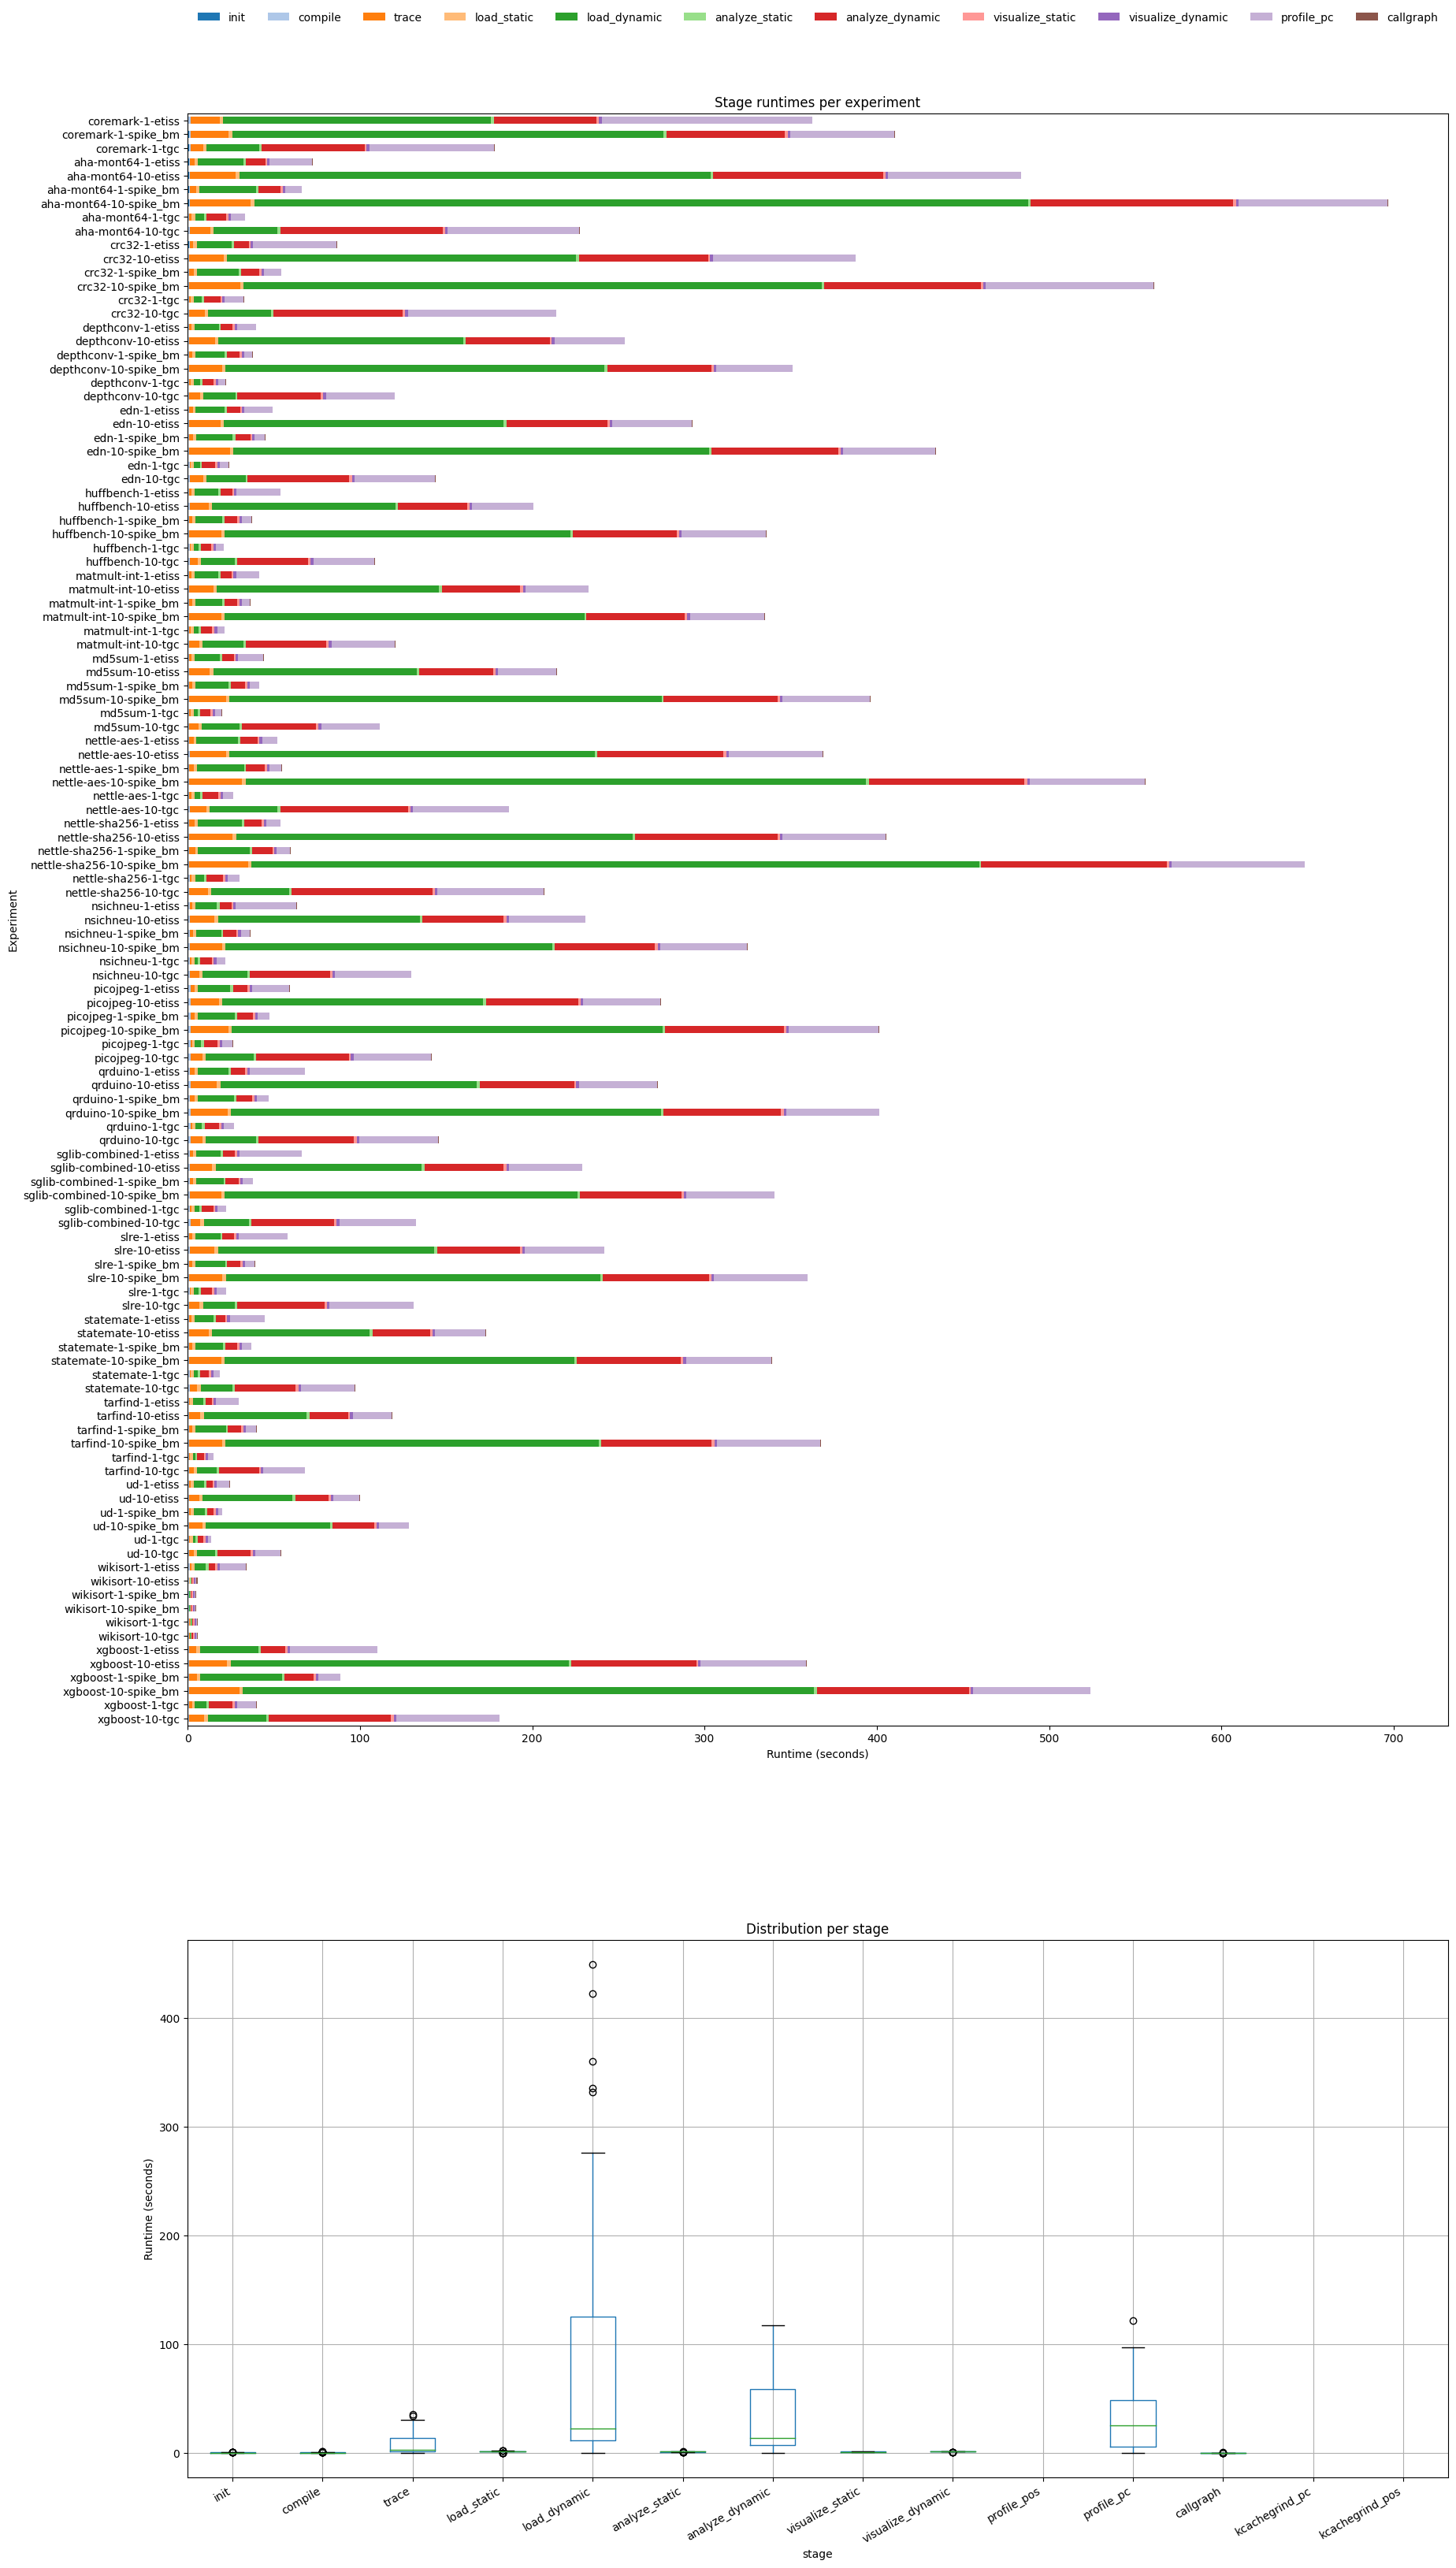

In [24]:
fig, axes = plt.subplots(2, 1, figsize=(20, 40), gridspec_kw={'height_ratios': [3, 1]})

# (1) Stacked horizontal bar per experiment
# Plot stacked horizontal bars
df_new.plot(
    kind="barh", stacked=True, ax=axes[0],
    color=[stage_colors[c] for c in cols]
)
axes[0].set_xlabel("Runtime (seconds)")
axes[0].set_ylabel("Experiment")
axes[0].set_title("Stage runtimes per experiment")
axes[0].invert_yaxis()  # so experiment 1 is at top
axes[0].legend(
    loc="lower center", 
    bbox_to_anchor=(0.5, 1.05), 
    ncol=len(df_new.columns), 
    frameon=False
)

# (2) Boxplots per super-stage
melted_df.boxplot(column="runtime", by="stage", ax=axes[1])
axes[1].set_ylabel("Runtime (seconds)")
axes[1].set_title("Distribution per stage")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=30, ha="right")

plt.suptitle("")
# plt.tight_layout()
plt.savefig("out1.pdf")
plt.savefig("out1.png")
plt.show()

In [21]:
df_new2 = dummy_df_.copy()
melted2_df = df_new2.melt(var_name='stage', value_name='runtime', id_vars=["factor", "program", "simulator"])
melted2_df["stage"] = pd.Categorical(melted2_df["stage"], categories=stage_order, ordered=True)
assert not pd.isna(melted2_df["stage"]).any()
melted2_df["stage_factor"] = melted2_df["stage"].astype(str) + "-" + melted2_df["factor"].astype(str)
melted2_df

,factor,program,simulator,stage,runtime,stage_factor
0,1,coremark,etiss,analyze_dynamic,59.599,analyze_dynamic-1
1,1,coremark,spike_bm,analyze_dynamic,68.898,analyze_dynamic-1
2,1,coremark,tgc,analyze_dynamic,59.720,analyze_dynamic-1
3,1,aha-mont64,etiss,analyze_dynamic,11.139,analyze_dynamic-1
4,10,aha-mont64,etiss,analyze_dynamic,98.590,analyze_dynamic-10
...,...,...,...,...,...,...
1633,10,xgboost,etiss,visualize_static,1.131,visualize_static-10
1634,1,xgboost,spike_bm,visualize_static,1.248,visualize_static-1
1635,10,xgboost,spike_bm,visualize_static,1.289,visualize_static-10
1636,1,xgboost,tgc,visualize_static,1.224,visualize_static-1


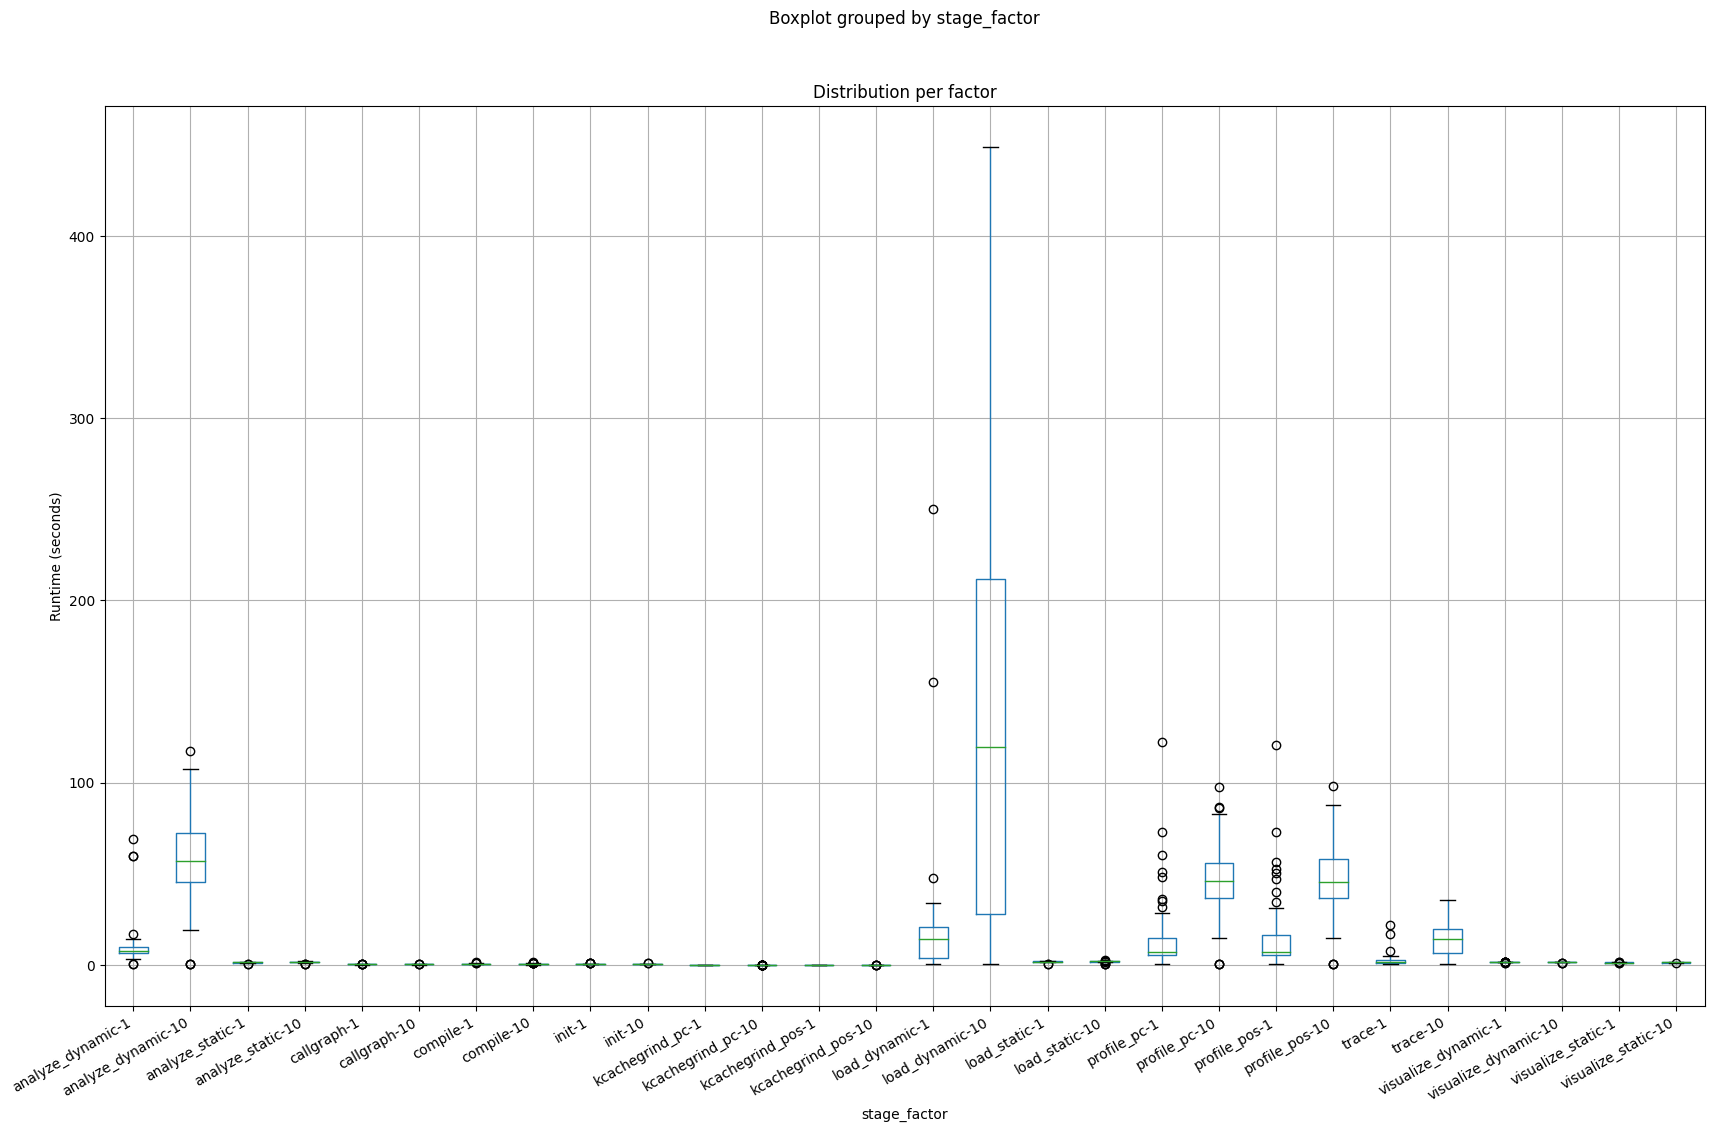

In [25]:
fig, axes = plt.subplots(1, 1, figsize=(20, 12))
axes = [axes]
# (2) Boxplots per super-stage
melted2_df.boxplot(column="runtime", by="stage_factor", ax=axes[0])
axes[0].set_ylabel("Runtime (seconds)")
axes[0].set_title("Distribution per factor")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=30, ha="right")
plt.show()